In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv")

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df.duplicated().sum()

0

In [8]:
df["Geography"].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [9]:
df.drop(columns=["RowNumber","CustomerId","Surname"],inplace=True)

In [10]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
df=pd.get_dummies(df,columns=["Geography","Gender"],drop_first=True)

In [12]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [13]:
x=df.drop(columns=['Exited'])
y=df["Exited"]

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=18)

In [15]:
x_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
8579,650,34,4,106005.54,1,0,1,142995.32,False,False,True
8894,485,39,2,75339.64,1,1,1,70665.16,False,False,False
5078,743,35,6,79388.33,1,1,1,193360.69,False,True,True
505,584,31,5,0.00,2,1,0,31474.27,False,False,True
6735,842,37,4,132446.08,2,1,0,87071.18,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
2290,658,50,2,0.00,2,1,0,52137.73,False,True,True
5294,509,32,9,170661.47,1,1,1,21646.20,True,False,True
1726,776,38,5,112281.70,1,0,1,89893.60,True,False,True
2885,660,42,5,0.00,2,1,0,115509.59,False,True,True


In [16]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [17]:
x_train

array([[-0.00453947, -0.46333723, -0.35142635, ..., -0.57677292,
        -0.56888201,  0.91416872],
       [-1.71266412,  0.01239277, -1.04440413, ..., -0.57677292,
        -0.56888201, -1.09388997],
       [ 0.95822169, -0.36819123,  0.34155142, ..., -0.57677292,
         1.75783377,  0.91416872],
       ...,
       [ 1.29984662, -0.08275323, -0.00493747, ...,  1.73378459,
        -0.56888201,  0.91416872],
       [ 0.09898324,  0.29783076, -0.00493747, ..., -0.57677292,
         1.75783377,  0.91416872],
       [ 0.46131271,  0.96385276,  1.38101808, ..., -0.57677292,
        -0.56888201,  0.91416872]])

In [18]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

2024-06-10 20:16:25.516351: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-10 20:16:25.516474: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-10 20:16:25.662519: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [19]:
model=Sequential()
model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(1,activation="sigmoid"))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
model.compile(loss="binary_crossentropy",optimizer="Adam",metrics=["accuracy"])

In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
history=model.fit(x_train,y_train,epochs=100,validation_split=0.25)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7843 - loss: 0.5445 - val_accuracy: 0.8175 - val_loss: 0.4491
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8088 - loss: 0.4451 - val_accuracy: 0.8155 - val_loss: 0.4233
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8172 - loss: 0.4235 - val_accuracy: 0.8255 - val_loss: 0.4124
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8321 - loss: 0.4031 - val_accuracy: 0.8300 - val_loss: 0.4055
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8276 - loss: 0.4033 - val_accuracy: 0.8330 - val_loss: 0.3999
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8294 - loss: 0.3910 - val_accuracy: 0.8395 - val_loss: 0.3944
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8357 - loss: 0.3950 - val_accuracy: 0.8405 - val_loss: 0.3869
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8478 - loss: 0.3719 - val_accu

In [23]:
model.layers[0].get_weights()

[array([[ 0.04575659,  0.02805106,  0.19864559, -0.04694176,  0.2045746 ,
         -0.12551638,  0.00235933,  0.24029773, -0.07060942, -0.05344662,
         -0.08425181],
        [ 0.29374298, -0.58056533,  0.53286827,  0.6573319 , -0.17943975,
         -0.43986478,  0.09557104,  0.26319432, -0.69889736,  0.5016678 ,
          0.17921056],
        [-0.07754207,  0.07601463,  0.22870196, -0.00896022,  0.28655288,
          0.16617155,  0.03547222, -0.23452334,  0.06775733, -0.76692396,
          0.08163561],
        [ 1.4126834 ,  0.21482828,  0.19530278, -0.5030038 ,  0.39508817,
         -0.10372227, -0.31334028,  0.17883626, -0.47694337,  0.05571298,
          0.49791154],
        [-0.37273744,  0.12290517,  0.03591424, -0.07034369, -0.14221826,
         -0.11949097, -1.4737676 ,  0.58018744, -0.24270713,  0.16479667,
          0.99798256],
        [ 0.19377889, -0.09348848,  0.12316858,  0.17644297, -0.0078446 ,
         -0.36262783,  0.02162664,  0.987399  ,  0.15682824, -0.4231086

In [24]:
model.layers[1].get_weights()

[array([[-0.960678  ,  0.5138138 , -0.02391526,  0.41994804,  0.03826956,
         -0.8652696 ,  0.3558552 , -0.05411211, -0.07198595, -0.39119893,
          0.29050705],
        [-0.5242284 ,  0.41094756,  0.10836841, -0.88811636, -0.4094974 ,
         -0.5272049 , -0.7300805 ,  0.27068943, -0.14142375, -0.34587637,
          0.2828    ],
        [-0.12615322, -0.78105974, -0.75350296, -0.77506226,  0.3784236 ,
          0.21330254, -0.09108599,  0.31050664, -0.14785212,  0.047078  ,
          0.24983762],
        [ 0.4713213 ,  0.04742459, -0.1533158 ,  0.43726236,  0.50294906,
         -0.24623498, -0.51798177,  0.4107754 , -0.49649486,  0.4157392 ,
          0.31362155],
        [ 0.00256482,  0.38850138,  0.5990019 ,  0.03483329,  0.3367324 ,
         -0.0104489 ,  0.44802055,  0.0226895 ,  0.05879125, -0.5799463 ,
          0.19363391],
        [ 0.25800246, -0.03862932,  0.1778107 , -0.24105108,  0.38903567,
         -0.09290588, -0.25946736, -0.101295  , -0.26101956,  0.3492425

In [25]:
model.layers[2].get_weights()

[array([[ 0.77232194],
        [ 0.27401203],
        [-0.46222076],
        [ 1.0904527 ],
        [-0.39505246],
        [ 1.3789567 ],
        [ 1.3232327 ],
        [-0.79359454],
        [ 0.12290412],
        [-0.532475  ],
        [-0.8882178 ]], dtype=float32),
 array([-0.3560839], dtype=float32)]

In [26]:
y_pred=model.predict(x_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [27]:
y_pred.shape

(2000, 1)

In [28]:
y_pred=np.where(y_pred>=0.5,1,0)


In [29]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [30]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred)
score

0.8525

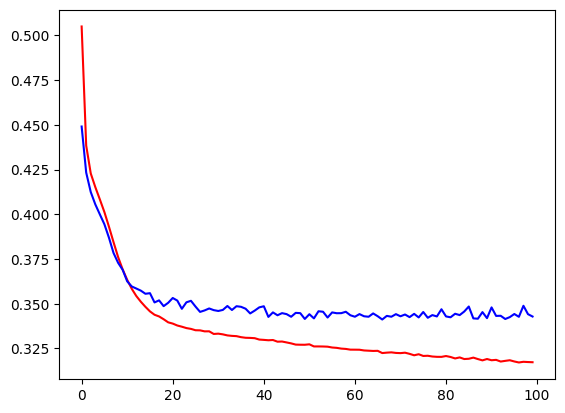

In [31]:
plt.plot(history.history["loss"],c="r")
plt.plot(history.history["val_loss"],c="b")

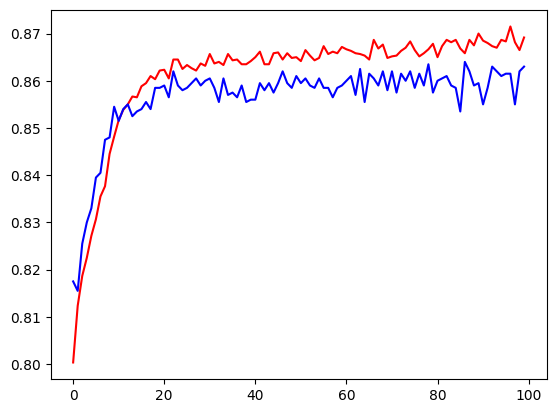

In [32]:
plt.plot(history.history["accuracy"],c="r")
plt.plot(history.history["val_accuracy"],c="b")